# Processing the data

In [ ]:
# download the data file from the drive
!curl -LOJ 'https://drive.google.com/uc?export=download&id=17KDl-ktcg5yOZLAbodtMDqwFACdv87zb'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('insurance.csv')
print(data.head())

# converting sex, smoker, region into categorical varibale 
from sklearn.preprocessing import LabelEncoder

# sex
data.sex = LabelEncoder().fit_transform(data.sex) 

# smoker or not
data.smoker = LabelEncoder().fit_transform(data.smoker)

# region
data.region = LabelEncoder().fit_transform(data.region)

print(data.head())

# Data input output devision (without removing outliers)
x = data.drop(['charges'], axis = 1)
y = data['charges']
y.head()



# split the data set as 15% in test set and 85% in training set (without removing outliers)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   2042      0 --:--:-- --:--:-- --:--:--  2042
  2 55628    2  1377    0     0   3889      0  0:00:14 --:--:--  0:00:14  3889
curl: (23) Failed writing body (0 != 1377)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705  

# Linear regression

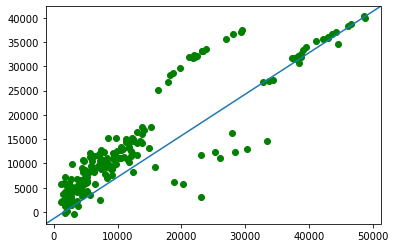

In [ ]:
# Run linear regression 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin = LinearRegression()
lin.fit(x_train, y_train)

y_lin_train = lin.predict(x_train)
y_lin_test = lin.predict(x_test)

# Error measurement using root mean square (EMSE) method with outlier
import math
from sklearn.metrics import mean_squared_error

train_error_lin = math.sqrt(metrics.mean_squared_error(y_train, y_lin_train))
test_error_lin = math.sqrt(metrics.mean_squared_error(y_test, y_lin_test))

# Plotting original y vs. predicted y of the test set
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(y_test,y_lin_test,color='green')
plt.show()

In [ ]:
#Install the MLxtend package
!pip3 install mlxtend --user

# Ridge regression

Alpha: 0.21


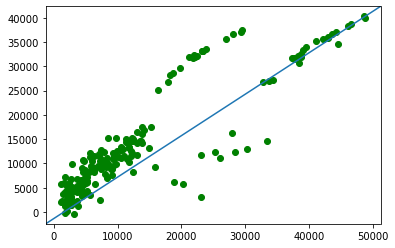

In [ ]:
# Run ridge regression 
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.0001, 0.001, 0.04, 0.09, 0.1, 0.11, 0.13, 0.21, 0.22, 0.5, 1.0, 3.0, 5.0, 10.0, 15.5])
ridge.fit(x_train, y_train)

print('Alpha:', ridge.alpha_)

y_ridge_train = ridge.predict(x_train)
y_ridge_test = ridge.predict(x_test)

# Error measurement using root mean square (EMSE) method with outlier
import math
from sklearn.metrics import mean_squared_error

train_error_ridge = math.sqrt(metrics.mean_squared_error(y_train, y_ridge_train))
test_error_ridge = math.sqrt(metrics.mean_squared_error(y_test, y_ridge_test))

# Plotting original y vs. predicted y of the test set
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(y_test,y_ridge_test,color='green')
plt.show()

# Support vector regression 

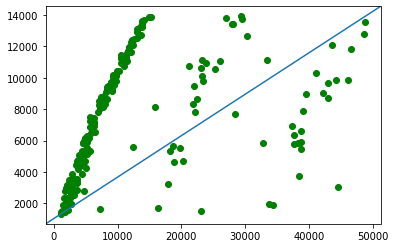

In [ ]:
# Run svm for regression (SVR)
# SVM for classification is called as SVC
%matplotlib inline
from sklearn.svm import SVR
s = SVR(kernel='linear')
s.fit(x_train, y_train)

y_svm_train = s.predict(x_train)
y_svm_test = s.predict(x_test)

# Error measurement using root mean square (EMSE) method with outlier
import math
from sklearn.metrics import mean_squared_error

train_error_svm = math.sqrt(metrics.mean_squared_error(y_train, y_svm_train))
test_error_svm = math.sqrt(metrics.mean_squared_error(y_test, y_svm_test))

# Plotting original y vs. predicted y of the test set
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(y_test,y_svm_test,color='green')
plt.show()

# Neural network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________
36/36 [==============================] - 1s 3ms/step - loss: 315748146.1622 - mean_squared_error: 315748146.1622


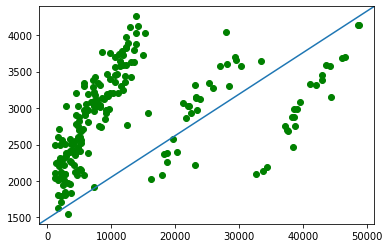

In [ ]:
# Nueral Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, kernel_initializer='normal', input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

model.fit(x_train, y_train)

yn_train = model.predict(x_train)
yn_test = model.predict(x_test)

# Error measurement using root mean square (EMSE) method with outlier
import math
from sklearn.metrics import mean_squared_error

train_error_neural = math.sqrt(metrics.mean_squared_error(y_train, yn_train))
test_error_neural = math.sqrt(metrics.mean_squared_error(y_test, yn_test))

# Plotting original y vs. predicted y of the test set
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(y_test,yn_test,color='green')
plt.show()

# Random forest regression

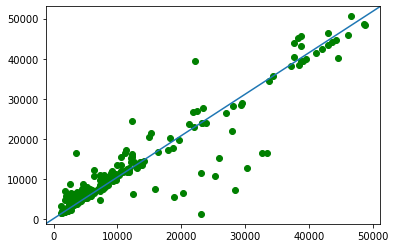

In [ ]:
# run random forest 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_rf_train = rf.predict(x_train)
y_rf_test = rf.predict(x_test)

# Error measurement using root mean square (EMSE) method with outlier
import math
from sklearn.metrics import mean_squared_error

train_error_rf = math.sqrt(metrics.mean_squared_error(y_train, y_rf_train))
test_error_rf = math.sqrt(metrics.mean_squared_error(y_test, y_rf_test))

# Plotting original y vs. predicted y of the test set
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(y_test,y_rf_test,color='green')
plt.show()

# All errors

In [ ]:
print("linear")
print("train error=", train_error_lin,"testing error=", test_error_lin)
print()

print("ridge")
print("train error=", train_error_ridge,"testing error=", test_error_ridge)
print()

print("svm")
print("train error=", train_error_svm,"testing error=", test_error_svm)
print()


print("neural")
print("train error=", train_error_neural,"testing error=", test_error_neural)
print()

print("random forest")
print("train error=", train_error_rf,"testing error=", test_error_rf)
print()